In [1]:
import numpy as np # linear algebra
import pandas as pd # df processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv('Loan payments data.csv')
df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

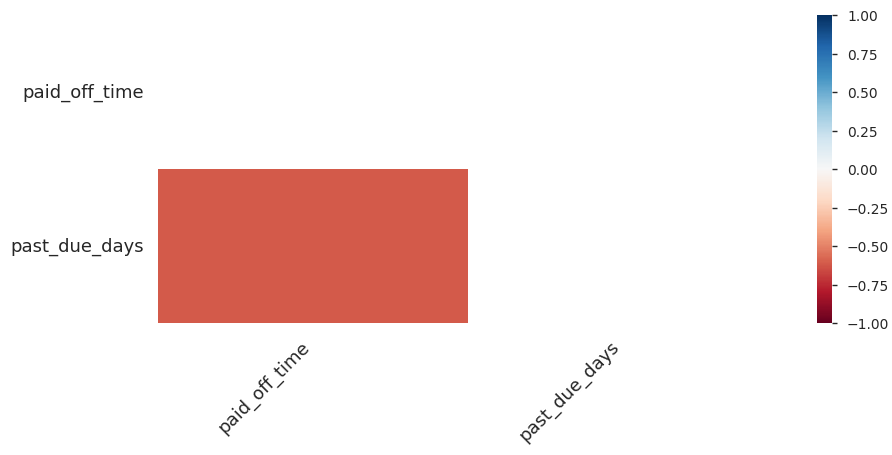

In [3]:
profile = ProfileReport(df, title="Loan Profiling Report", html={"style": {"full_width": True}}, sort=None)
profile

In [4]:
df.isna().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [5]:
df['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [6]:
{column: len(df[column].unique()) for column in df.columns}

{'Loan_ID': 500,
 'loan_status': 3,
 'Principal': 6,
 'terms': 3,
 'effective_date': 7,
 'due_date': 25,
 'paid_off_time': 321,
 'past_due_days': 34,
 'age': 33,
 'education': 4,
 'Gender': 2}

In [7]:
def binary_encode(df1, column, positive_value):
    df1 = df1.copy()
    df1[column] = df1[column].apply(lambda x: 1 if x == positive_value else 0)
    return df1

def ordinal_encode(df1, column, ordering):
    df1 = df1.copy()
    df1[column] = df1[column].apply(lambda x: ordering.index(x))
    return df1

In [8]:
    # Drop Loan_ID column
    df = df.drop('Loan_ID', axis=1)
    df

,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...
495,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [9]:
    # Create date/time columns
    for column in ['effective_date', 'due_date', 'paid_off_time']:
        df[column] = pd.to_datetime(df[column])

In [10]:
df['effective_day'] = df['effective_date'].apply(lambda x: x.day)

df['due_month'] = df['due_date'].apply(lambda x: x.month)
df['due_day'] = df['due_date'].apply(lambda x: x.day)

df['paid_off_month'] = df['paid_off_time'].apply(lambda x: x.month)
df['paid_off_day'] = df['paid_off_time'].apply(lambda x: x.day)
df['paid_off_hour'] = df['paid_off_time'].apply(lambda x: x.hour)

df = df.drop(['effective_date', 'due_date', 'paid_off_time'], axis=1)

In [11]:
    # Fill missing values with column means
    for column in ['past_due_days', 'paid_off_month', 'paid_off_day', 'paid_off_hour']:
        df[column] = df[column].fillna(df[column].mean())

In [12]:
    # Binary encode the Gender column
    df = binary_encode(df, 'Gender', positive_value='male')

In [13]:
    # Ordinal encode the education column
    education_ordering = [
        'High School or Below',
        'college',
        'Bechalor',
        'Master or Above'
    ]
    df = ordinal_encode(df, 'education', ordering=education_ordering)

In [14]:
    # Encode the label (loan_status) column
    label_mapping = {'COLLECTION': 0, 'PAIDOFF': 1, 'COLLECTION_PAIDOFF': 2}
    df['loan_status'] = df['loan_status'].replace(label_mapping)

C:\Users\S004160239\AppData\Local\Temp\ipykernel_8096\1345583340.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_status'] = df['loan_status'].replace(label_mapping)


In [15]:
    # Split df into X and y
    y = df['loan_status'].copy()
    X = df.drop('loan_status', axis=1).copy()

In [16]:
    # Scale X with a standard scaler
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

names = [
    "CatBoostClassifier",
    "Logistic Regression",
    "Support Vector Machine",
    "Decision Tree",
    "Neural Network",
    "Random Forest",
    "XGBoost",
    "LGBMClassifier",
    "XGBRFClassifier",
    "GradientBoosting",
    "GaussianNB",
    "KNeighborsClassifier"
]
models = [
    CatBoostClassifier(verbose= False),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    lightgbm.LGBMClassifier(max_depth=2, random_state=4),
    xgboost.XGBRFClassifier(max_depth=3, random_state=1),
    GradientBoostingClassifier(max_depth=2, random_state=1),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
]

accuracy=[]
for model, name in zip(models,names):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('Confusion matrix of ',name)
    print(confusion_matrix(y_test, y_pred))
    ac = accuracy_score(y_test, y_pred)
    print('Accuracy score is ',ac)
    accuracy.append(ac)
    print('='*50)

Accuracy_list = pd.DataFrame(list(zip(names, accuracy)),columns =['Model', 'Accuracy'])
Accuracy_list= Accuracy_list.sort_values('Accuracy', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=True, key=None)

plt.rcParams['figure.figsize']=20,6 
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Model',y = 'Accuracy',data = Accuracy_list , palette = "rocket", saturation =1.5)
plt.xlabel("Model", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Sorted Accuracy of different Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()